In [1]:
'''
###CCT416H Assignment Code by Charles Ezechukwu###
Please find attached files of the 2 excel files: ls.csv and sb.csv  
used in this code, upload them to a folder, named "data"
Data Sources:
 http://www.statcan.gc.ca/tables-tableaux/sum-som/l01/cst01/health100a-eng.htm
http://www.statcan.gc.ca/tables-tableaux/sum-som/l01/cst01/health88a-eng.htm
'''
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import json
%matplotlib inline
matplotlib.style.use('ggplot')


In [2]:
####Read Statistics Canada excel, these file was formatted before load to iPython ####
# Read Life Satisfaction excel data obtained from Statistics Canada
lifeSat_data1 = pd.read_csv('data/ls.csv')
# Read Sense of belonging excel data obtained from Statistics Canada
senseBelong_data1 = pd.read_csv('data/sb.csv')


In [3]:
############# Take a look at the raw excel data: #############
lifeSat_title = 'Life Satisfaction in Canada (source: Statistics Canada)'
print(lifeSat_title, '\n', lifeSat_data1) ## check the details of Life Satisfaction data


Life Satisfaction in Canada (source: Statistics Canada) 
                      Province      2011      2012      2013      2014
0                      Canada  26242556  26553652  26652318  27124563
1                       Males  12901778  13055736  13151262  13377590
2                     Females  13340778  13497916  13501056  13746974
3   Newfoundland and Labrador    400473    399237    397175    415857
4                       Males    196289    193108    189635    201785
5                     Females    204184    206130    207540    214073
6        Prince Edward Island    113982    115324    114831    113728
7                       Males     54848     55391     56199     54089
8                     Females     59134     59933     58631     59639
9                 Nova Scotia    730220    741768    715762    721685
10                      Males    347335    354279    342247    352798
11                    Females    382885    387489    373515    368887
12              New Brunswick   

In [4]:
senseBelong_title = 'Sense of belonging in Canada (source: Statistics Canada)'
print(senseBelong_title, '\n',  senseBelong_data1) ## check the details of Sense of belonging data


Sense of belonging in Canada (source: Statistics Canada) 
                      Province      2011      2012      2013      2014
0                      Canada  18288463  18857175  19044557  19435211
1                       Males   8735065   9251958   9262880   9471970
2                     Females   9553398   9605218   9781677   9963241
3   Newfoundland and Labrador    331444    335027    328776    342808
4                       Males    161026    161452    155462    166379
5                     Females    170418    173575    173313    176429
6        Prince Edward Island     90412     90092     87513     90043
7                       Males     45709     43494     42167     44469
8                     Females     44703     46598     45345     45573
9                 Nova Scotia    562803    559364    560605    580289
10                      Males    270409    259262    271156    281302
11                    Females    292394    300101    289449    298987
12              New Brunswick  

In [5]:
##########Process the Life Satisfaction data ############
#Select the provinces by their index 
lifeSat_data2 = lifeSat_data1.loc[[3,6,9,12,15,18,21,24,27,30,33,36,39]]
lifeSat_byProvince_title = 'Life Satisfaction in Canada by Province' 


In [6]:
#Remove the index column to make the Province data ready for plotting
lifeSat_data3 = lifeSat_data2.groupby(['Province']).sum()
print(lifeSat_byProvince_title, '\n',  lifeSat_data3)


Life Satisfaction in Canada by Province 
                                2011      2012      2013      2014
Province                                                         
Alberta                     2839212   2912033   2973238   3106941
British Columbia            3513261   3450155   3539222   3546612
Manitoba                     878478    896287    915618    918700
New Brunswick                587681    584585    570689    573222
Newfoundland and Labrador    400473    399237    397175    415857
Northwest Territories         31762     30703     31329     30611
Nova Scotia                  730220    741768    715762    721685
Nunavut                       15367     14326     21822     22411
Ontario                    10111312  10342069  10260764  10389484
Prince Edward Island         113982    115324    114831    113728
Quebec                      6243350   6277566   6301961   6439858
Saskatchewan                 749734    761919    781927    816938
Yukon                         2772

In [7]:
##########Process the Sense of belonging data############
#Select the provinces by their index 
senseBelong_data2 = senseBelong_data1.loc[[3,6,9,12,15,18,21,24,27,30,33,36,39]]
senseBelong_byProvince_title = 'Sense of belonging in Canada by Province' 


In [8]:
#Remove the index column to make the Province data ready for plotting
senseBelong_data3 = senseBelong_data2.groupby(['Province']).sum()
print(senseBelong_byProvince_title, '\n',  senseBelong_data3)


Sense of belonging in Canada by Province 
                               2011     2012     2013     2014
Province                                                     
Alberta                    1941154  2012245  2048001  2216837
British Columbia           2623914  2586201  2727214  2668204
Manitoba                    655802   667373   687966   680007
New Brunswick               445599   440878   441579   440135
Newfoundland and Labrador   331444   335027   328776   342808
Northwest Territories        27575    27632    26822    27749
Nova Scotia                 562803   559364   560605   580289
Nunavut                      13667    14645    21707    22362
Ontario                    7344549  7583184  7612346  7736583
Prince Edward Island         90412    90092    87513    90043
Quebec                     3642394  3914607  3879323  3960413
Saskatchewan                586093   604018   600310   647216
Yukon                        23058    21909    22396    22564


Text(0,0.5,'Province')

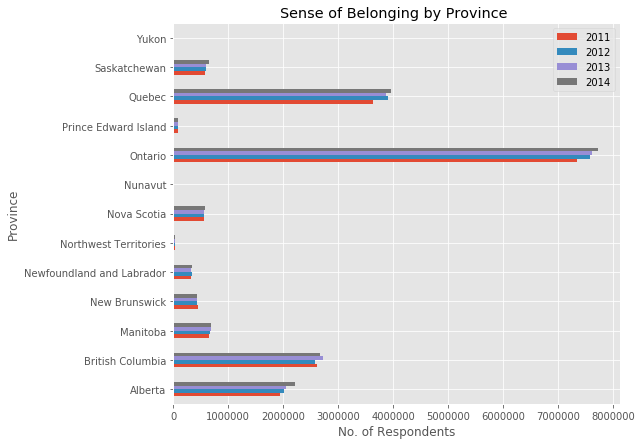

In [9]:
#########Output bar chart for both: Sense of belonging & Life Satisfaction######
#Print Horizontal bar of Sense of belonging by Province
senseBelong_plot = senseBelong_data3.plot(kind=('barh'), figsize=(8,7))
senseBelong_plot.set_title("Sense of Belonging by Province ")
senseBelong_plot.set_xlabel("No. of Respondents")
senseBelong_plot.set_ylabel("Province")


Text(0,0.5,'Province')

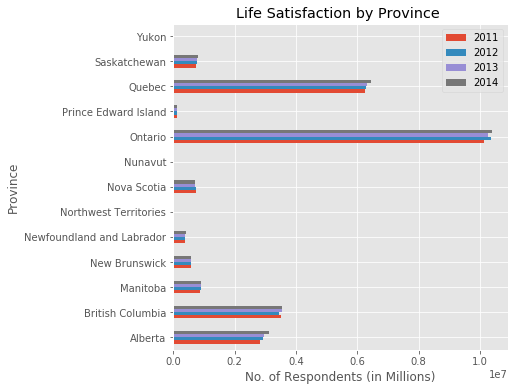

In [10]:
#Print Horizontal bar of Life Satisfaction by Province
lifeSat_plot = lifeSat_data3.plot(kind=('barh'), figsize=(6,6))
lifeSat_plot.set_title("Life Satisfaction by Province ")
lifeSat_plot.set_xlabel("No. of Respondents (in Millions)")
lifeSat_plot.set_ylabel("Province")


In [11]:
#####Create a cross-tabulation: 2014, Sense of belonging vs Life Satisfaction#####
senseBel_table = pd.DataFrame(senseBelong_data2, columns = ['Province','2014'])
lifeSat_table = pd.DataFrame(lifeSat_data2, columns = ['2014'])
crossTable1 = pd.merge(senseBel_table, lifeSat_table, right_index=True, left_index=True,suffixes=(': Sense of belonging', ': Life Satisfaction') )
crossTable_title = 'Cross Tabulation: Sense of belonging vs Life Satisfaction in 2014'


In [12]:
#Remove the index column to make the Cross-tabulation data ready for plotting
crossTable2= crossTable1.groupby(['Province']).sum()
print(crossTable_title, '\n',  crossTable2)


Cross Tabulation: Sense of belonging vs Life Satisfaction in 2014 
                            2014: Sense of belonging  2014: Life Satisfaction
Province                                                                    
Alberta                                     2216837                  3106941
British Columbia                            2668204                  3546612
Manitoba                                     680007                   918700
New Brunswick                                440135                   573222
Newfoundland and Labrador                    342808                   415857
Northwest Territories                         27749                    30611
Nova Scotia                                  580289                   721685
Nunavut                                       22362                    22411
Ontario                                     7736583                 10389484
Prince Edward Island                          90043                   113728
Quebec  

Text(0.5,1,'2014: Life Satisfaction by Sense of Belonging')

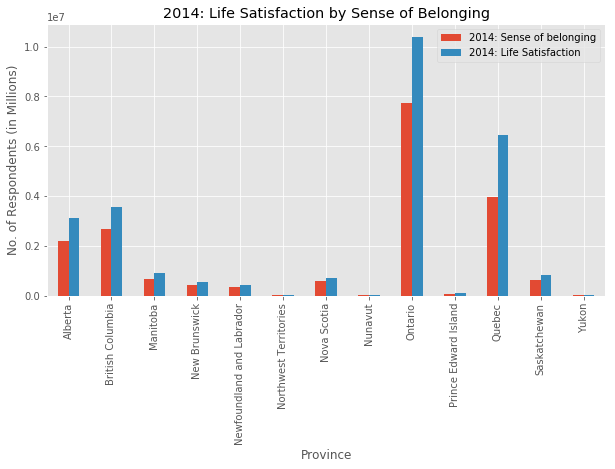

In [13]:
#Print Vertical bar of Cross-tabulation by Province
crossTable2_plot = crossTable2.plot(kind=('bar'), figsize=(10,5))
crossTable2_plot.set_ylabel("No. of Respondents (in Millions)")
crossTable2_plot.set_title("2014: Life Satisfaction by Sense of Belonging")


Text(0.5,1,'2014: Life Satisfaction by Sense of Belonging')

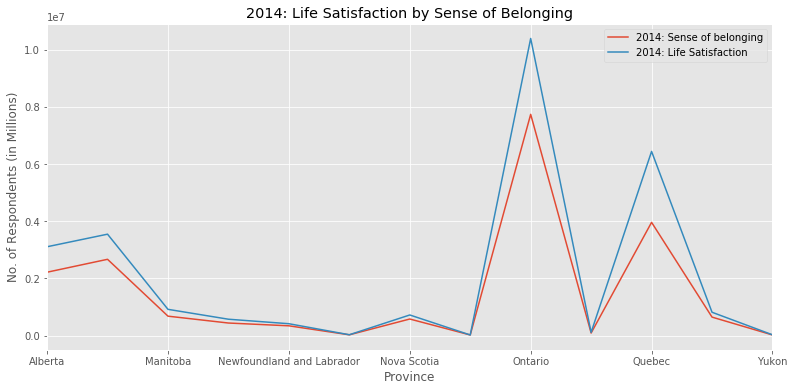

In [14]:
#Print line chart of Cross-tabulation by Province
crossTable2_plot = crossTable2.plot(figsize=(13,6))
crossTable2_plot.set_ylabel("No. of Respondents (in Millions)")
crossTable2_plot.set_title("2014: Life Satisfaction by Sense of Belonging")


In [15]:
######### Calculate Percentage of Life Satisfaction in Provinces #########
percentCalc1 = lifeSat_data2.loc[:, lifeSat_data2.columns != 'Province']
percentCalc2 = ((percentCalc1.div(percentCalc1.sum(axis=0), axis=1)))*100
desred_decimals = 2    
percentCalc3 = percentCalc2.apply(lambda x: round(x,desred_decimals))
percentCalc3['Province'] = ['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']

colnames = percentCalc3.columns.tolist() ##Check the order of columns
colnames
colnames = colnames[-1:] + colnames[:-1]##Re-arrange the columns
percentCalcTable = percentCalc3[colnames] 
percentCalc_title = 'Percentage of Life Satisfaction in Provinces'
print(percentCalc_title, '\n', percentCalcTable)


Percentage of Life Satisfaction in Provinces 
                      Province   2011   2012   2013   2014
3   Newfoundland and Labrador   1.53   1.50   1.49   1.53
6        Prince Edward Island   0.43   0.43   0.43   0.42
9                 Nova Scotia   2.78   2.79   2.69   2.66
12              New Brunswick   2.24   2.20   2.14   2.11
15                     Quebec  23.79  23.64  23.65  23.74
18                    Ontario  38.53  38.95  38.50  38.30
21                   Manitoba   3.35   3.38   3.44   3.39
24               Saskatchewan   2.86   2.87   2.93   3.01
27                    Alberta  10.82  10.97  11.16  11.45
30           British Columbia  13.39  12.99  13.28  13.08
33                      Yukon   0.11   0.10   0.10   0.11
36      Northwest Territories   0.12   0.12   0.12   0.11
39                    Nunavut   0.06   0.05   0.08   0.08


In [16]:
######### Calculate Percentage of Sense of Belonging in Provinces #########
sbpercentCalc1 = senseBelong_data2.loc[:,senseBelong_data2.columns != 'Province']
sbpercentCalc2 = ((sbpercentCalc1.div(sbpercentCalc1.sum(axis=0), axis=1)))*100
desred_decimals = 2    
sbpercentCalc3 = sbpercentCalc2.apply(lambda x: round(x,desred_decimals))
sbpercentCalc3['Province'] = ['Newfoundland and Labrador','Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']

colnames = sbpercentCalc3.columns.tolist() ##Check the order of columns
colnames
colnames = colnames[-1:] + colnames[:-1]##Re-arrange the columns
sbpercentCalcTable = sbpercentCalc3[colnames] 
sbpercentCalc_title = 'Percentage of Sense of Belonging in Provinces'
print(sbpercentCalc_title, '\n', sbpercentCalcTable)


Percentage of Sense of Belonging in Provinces 
                      Province   2011   2012   2013   2014
3   Newfoundland and Labrador   1.81   1.78   1.73   1.76
6        Prince Edward Island   0.49   0.48   0.46   0.46
9                 Nova Scotia   3.08   2.97   2.94   2.99
12              New Brunswick   2.44   2.34   2.32   2.26
15                     Quebec  19.92  20.76  20.37  20.38
18                    Ontario  40.16  40.21  39.97  39.81
21                   Manitoba   3.59   3.54   3.61   3.50
24               Saskatchewan   3.20   3.20   3.15   3.33
27                    Alberta  10.61  10.67  10.75  11.41
30           British Columbia  14.35  13.71  14.32  13.73
33                      Yukon   0.13   0.12   0.12   0.12
36      Northwest Territories   0.15   0.15   0.14   0.14
39                    Nunavut   0.07   0.08   0.11   0.12


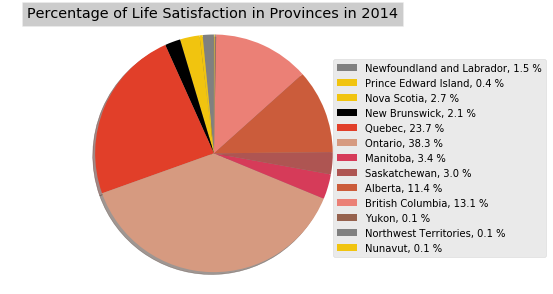

In [17]:
#######Pie Charts: Percentage of Life Satisfaction in Provinces in 2014 #######
labels = percentCalcTable['Province']
sizes = percentCalcTable['2014']
colors = ['#808080', '#f1c40f', '#f1c40f', '#000000',"#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(loc=(0.8, 0.1), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of Life Satisfaction in Provinces in 2014", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


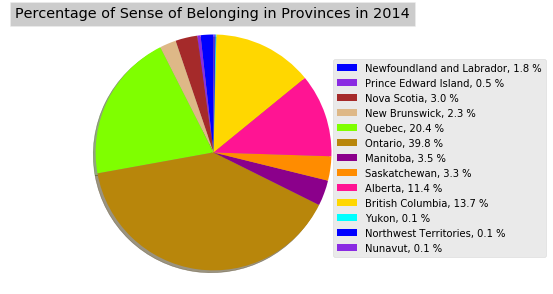

In [18]:
#######Pie Charts: Percentage of Sense of Belonging in Provinces in 2014 #######
sblabels = sbpercentCalcTable['Province']
sizes = sbpercentCalcTable['2014']
colors = ['#0000FF', '#8A2BE2', '#A52A2A', '#DEB887',"#7FFF00", "#B8860B", "#8B008B", "#FF8C00", "#FF1493", "#FFD700", "#00FFFF"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(loc=(0.8, 0.1), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of Sense of Belonging in Provinces in 2014", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


In [19]:
#############Summary Statistics: Life Satisfaction ##################
lifeSat_title = 'Summary Statistics: Life Satisfaction '
lifeSat_summaryStat = lifeSat_data2.describe()
print(lifeSat_title, '\n', lifeSat_summaryStat)


Summary Statistics: Life Satisfaction  
                2011          2012          2013          2014
count  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01
mean   2.018658e+06  2.042589e+06  2.050178e+06  2.086505e+06
std    3.041864e+06  3.095184e+06  3.084682e+06  3.130470e+06
min    1.536700e+04  1.432600e+04  2.182200e+04  2.241100e+04
25%    1.139820e+05  1.153240e+05  1.148310e+05  1.137280e+05
50%    7.302200e+05  7.417680e+05  7.157620e+05  7.216850e+05
75%    2.839212e+06  2.912033e+06  2.973238e+06  3.106941e+06
max    1.011131e+07  1.034207e+07  1.026076e+07  1.038948e+07


In [20]:
#############Summary Statistics: Sense of Belonging ##################
senseBelong_title = 'Summary Statistics: Sense of Belonging'
senseBelong_summaryStat = senseBelong_data2.describe()
print(senseBelong_title, '\n', senseBelong_summaryStat)


Summary Statistics: Sense of Belonging 
                2011          2012          2013          2014
count  1.300000e+01  1.300000e+01  1.300000e+01  1.300000e+01
mean   1.406805e+06  1.450552e+06  1.464966e+06  1.495016e+06
std    2.112316e+06  2.191886e+06  2.202077e+06  2.237120e+06
min    1.366700e+04  1.464500e+04  2.170700e+04  2.236200e+04
25%    9.041200e+04  9.009200e+04  8.751300e+04  9.004300e+04
50%    5.628030e+05  5.593640e+05  5.606050e+05  5.802890e+05
75%    1.941154e+06  2.012245e+06  2.048001e+06  2.216837e+06
max    7.344549e+06  7.583184e+06  7.612346e+06  7.736583e+06


In [21]:
###Pearson correlation to summarize the associated between two variables#####
from scipy.stats.stats import pearsonr 
pearsonCorr_title = ' Pearson correlation between Life Satisfaction and Sense of Belonging'
print(pearsonCorr_title , '\n',  pearsonr(senseBelong_data2['2014'], lifeSat_data2['2014'])[0])


 Pearson correlation between Life Satisfaction and Sense of Belonging 
 0.995515216721


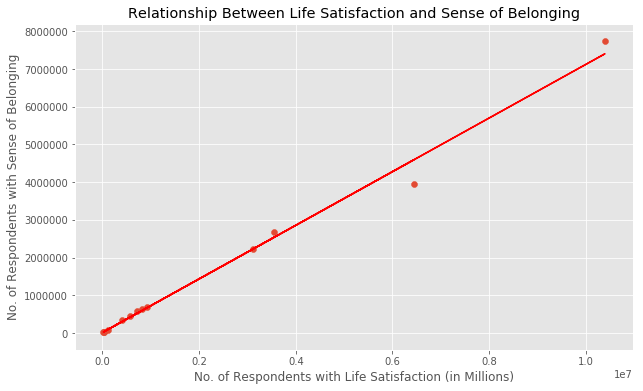

In [22]:
###### Scatter Diagram with Regression Line#######
x = crossTable2['2014: Life Satisfaction']
y = crossTable2['2014: Sense of belonging']
##fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title("Relationship Between Life Satisfaction and Sense of Belonging")
ax.set_xlabel("No. of Respondents with Life Satisfaction (in Millions)")
ax.set_ylabel("No. of Respondents with Sense of Belonging")
ax.scatter(x, y)
